In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import plotly.io as pio
import os

from matplotlib.gridspec import GridSpec
from tqdm.notebook import tqdm
from sklearn.ensemble import RandomForestClassifier


# ✅ Seaborn 테마 설정
sns.set_theme(
    style='white',  # 배경 스타일 ('darkgrid', 'whitegrid', 'dark', 'white', 'ticks' 가능)
    font='BM Hanna Pro',  # 폰트 설정 (Mac: 'AppleGothic', Windows: 'Malgun Gothic' 가능)
    rc={
        'axes.unicode_minus': False,  # 마이너스 기호 깨짐 방지
        'figure.figsize': (12, 6),    # 기본 그래프 크기 설정
        'axes.labelsize': 14,         # 축 레이블 크기
        'xtick.labelsize': 12,        # x축 눈금 크기
        'ytick.labelsize': 12,        # y축 눈금 크기
        'legend.fontsize': 12,        # 범례 폰트 크기
        'axes.titleweight': 'bold',   # 제목 굵게 표시
        'axes.titlesize': 16          # 제목 크기 설정
    }
)

# ✅ Jupyter Notebook 그래프 선명하게 출력
%config InlineBackend.figure_format = 'retina'

# ✅ Pandas 출력 설정 (데이터프레임 가독성 향상)
pd.set_option("display.max_columns", None)  # 모든 컬럼 출력

# ✅ 경고 메시지 무시 (불필요한 Warning 제거)
warnings.filterwarnings("ignore")

# ✅ Jupyter에서 외부 모듈 변경 사항 자동 반영
%load_ext autoreload
%autoreload 2

# ✅ Seaborn 추가 스타일링 (폰트 및 컬러)
sns.set_context("notebook", font_scale=1.2)  # 노트북 환경에 적합한 폰트 크기 조정

# ✅ Plotly 대화형 그래프 설정 (VSCode에서 대화형 그래프 활성화)
pio.renderers.default = "notebook"  # VSCode에서 대화형 Plotly 그래프 활성화

# ✅ Pandas 진행률 표시 (대량 데이터 처리 시 유용)
tqdm.pandas()

In [2]:
books_df = pd.read_csv("../data/amazon_bestsellers.csv")
books_df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
books_groupby = books_df.groupby(['Year', 'Genre'], observed=False)[['Name']].count().reset_index()

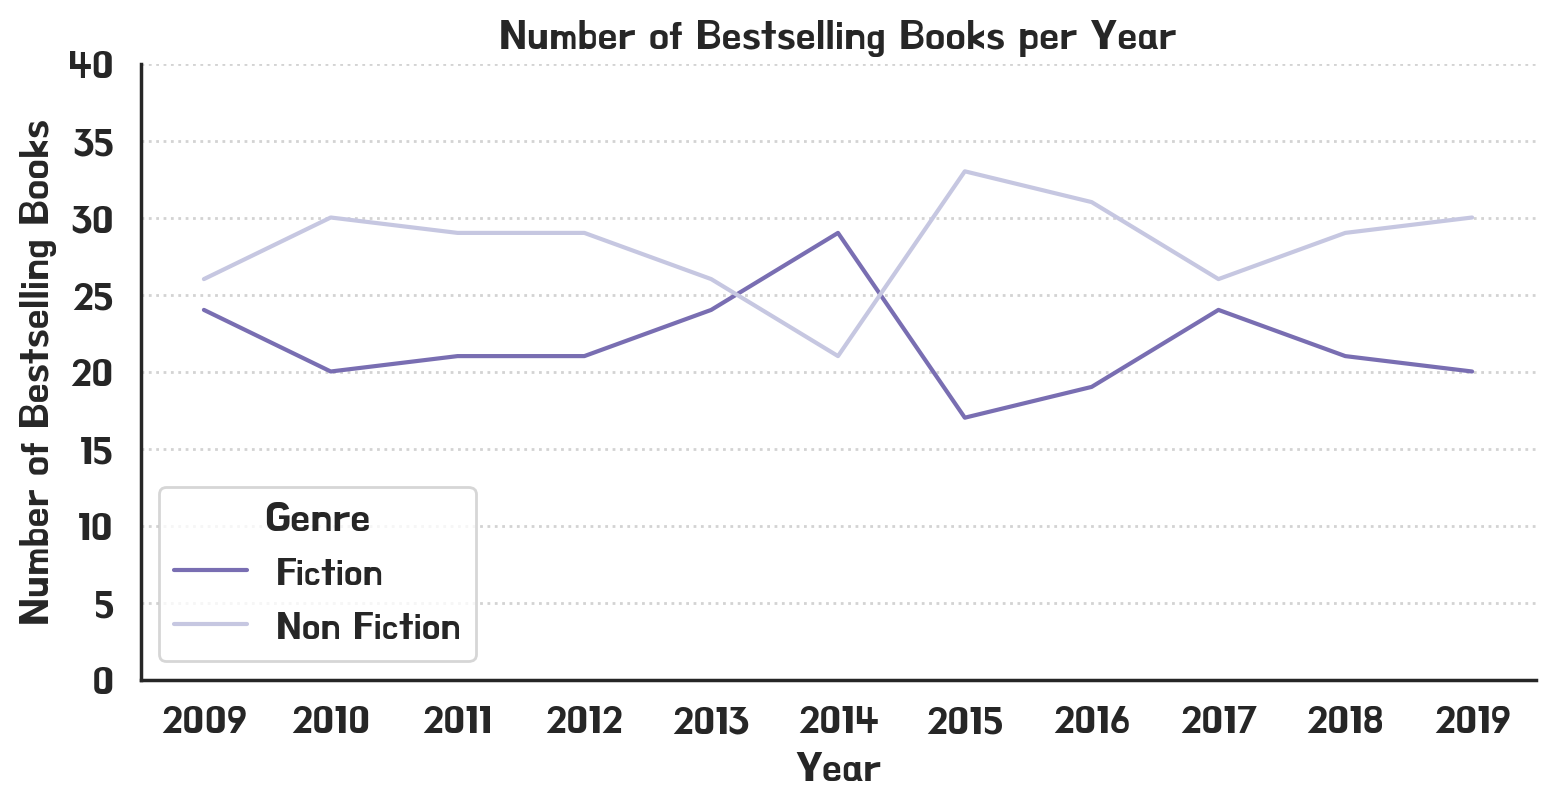

In [7]:
plt.figure(figsize=(9, 4))

sns.lineplot(data=books_groupby, x='Year', y='Name', hue='Genre', palette='Purples_r')
sns.despine()

plt.title("Number of Bestselling Books per Year")
plt.ylabel("Number of Bestselling Books")

plt.ylim([0, 40])
plt.xticks(books_df['Year'].unique())

plt.grid(axis='y', linestyle=':', color='lightgrey')

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.gridspec import GridSpec

movie_df = pd.read_csv('../data/highest_grossing_movies.csv')

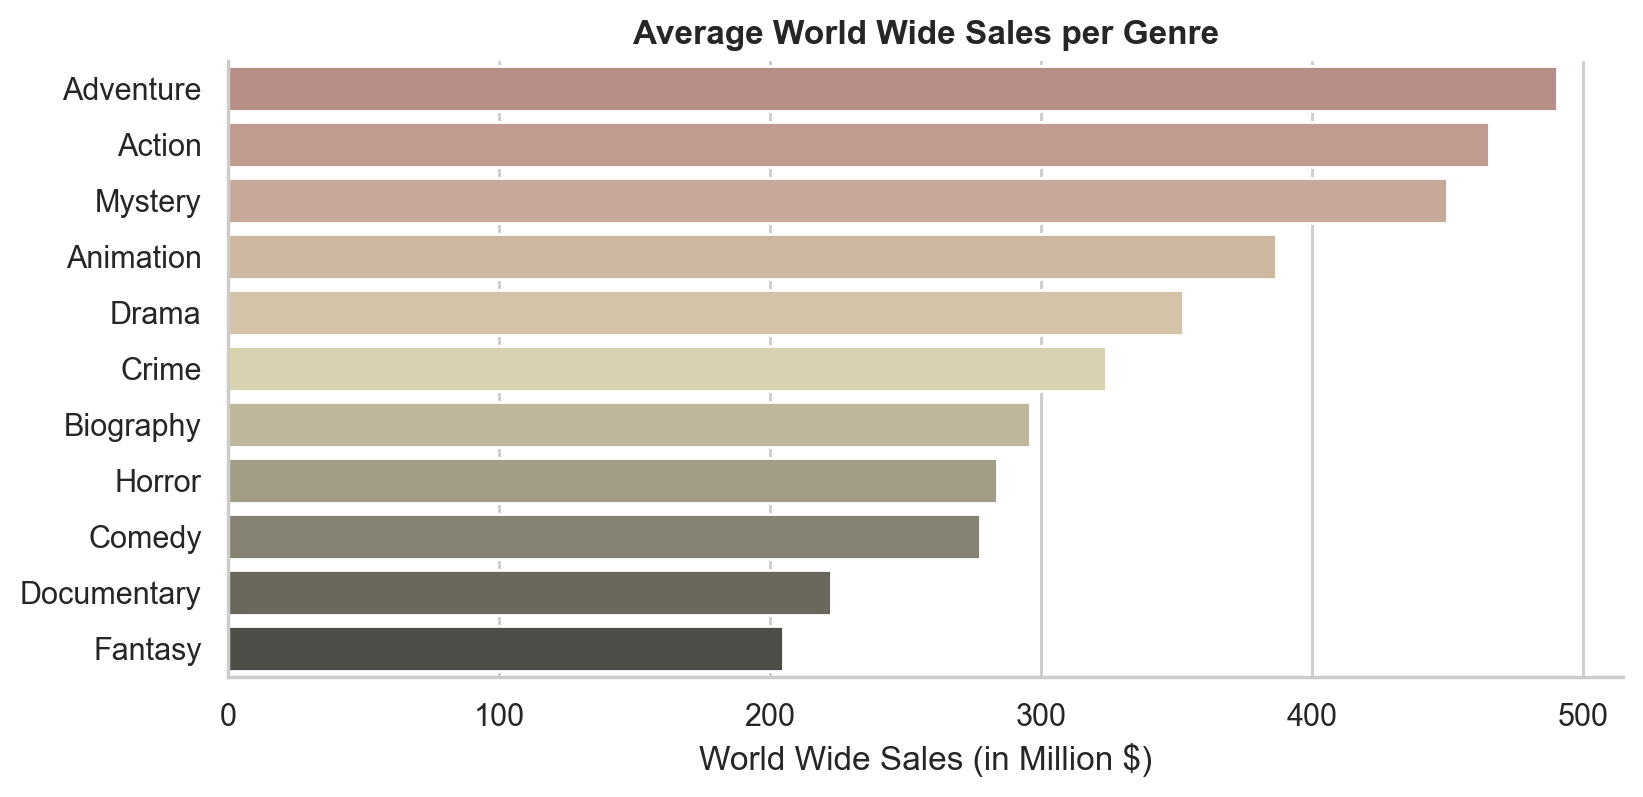

In [30]:
genre_order = movie_df.groupby('Genre (First)')[['World Wide Sales (in $)']].mean().sort_values(by='World Wide Sales (in $)', ascending=False).index

fig, ax = plt.subplots(figsize=(9, 4))

sns.set_style('whitegrid')
sns.barplot(data=movie_df, x='World Wide Sales (in $)', y='Genre (First)', errorbar=None, order=genre_order, palette='pink_d', ax=ax)
sns.despine()

ax.set_title("Average World Wide Sales per Genre")
ax.set_xlabel("World Wide Sales (in Million $)")
ax.set_ylabel("")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: int(x / 1e6)))

Text(0.5, 0, 'World Wide Sales (in Million $)')

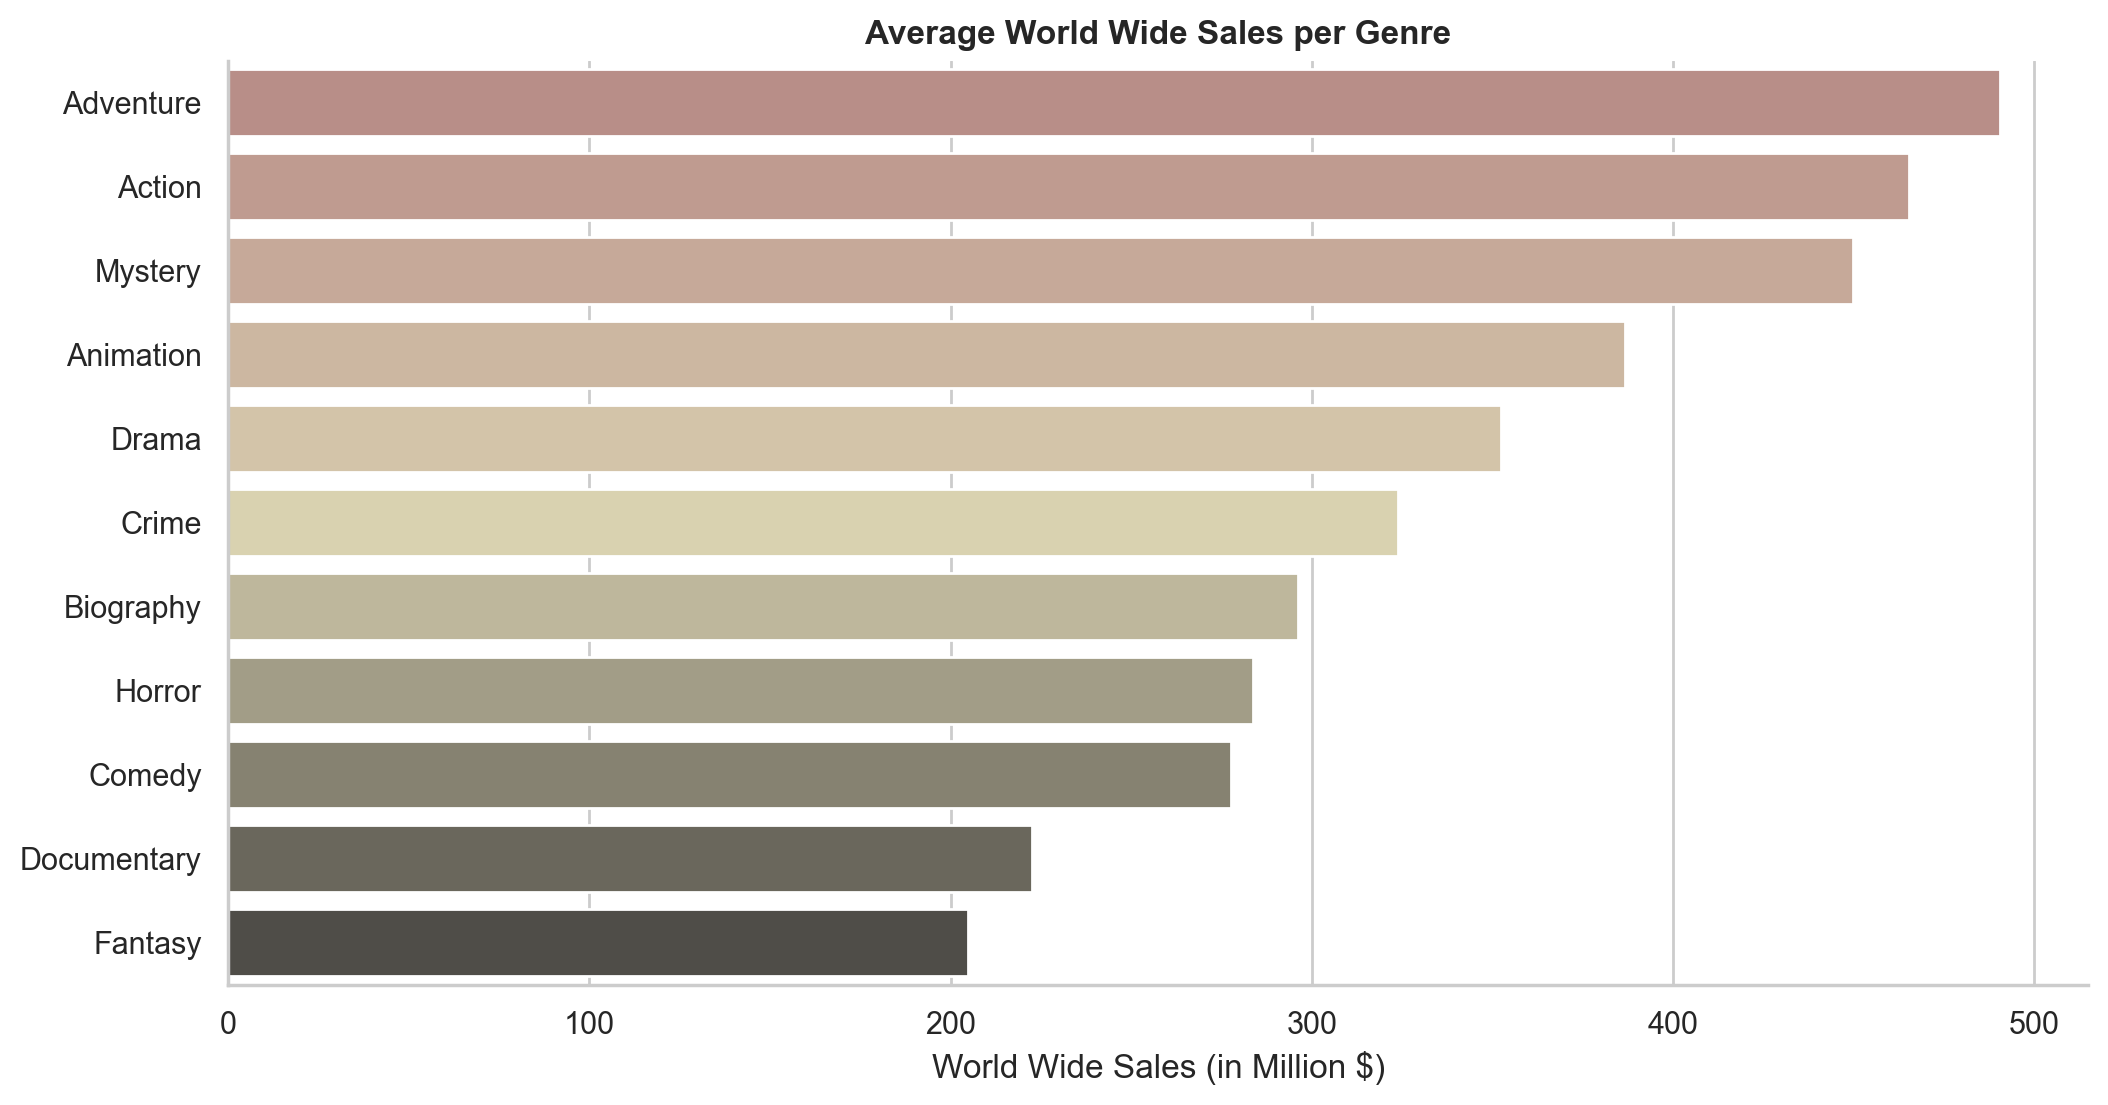

In [31]:
genre_order = movie_df.groupby('Genre (First)')[['World Wide Sales (in $)']].mean().sort_values(by='World Wide Sales (in $)', ascending=False).index

sns.set_style('whitegrid')

fig, ax = plt.subplots()
sns.barplot(data=movie_df, x='World Wide Sales (in $)', y='Genre (First)', errorbar=None, order=genre_order, palette='pink_d', ax=ax)
sns.despine()

ax.set_title('Average World Wide Sales per Genre') # 제목 추가
ax.set_ylabel('') # y축 라벨을 지워줌

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: int(x / 1e6)))  # x축 단위를 Million 단위로 맞추기
ax.set_xlabel('World Wide Sales (in Million $)') # 단위에 대한 설명을 추가한 버전으로 x축 라벨 업데이트
